# Summarizing 1D Data

After visualizing data, we need numerical summaries to describe datasets quantitatively. This section covers fundamental descriptive statistics that allow us to characterize location (where the data is centered) and scale (how spread out the data is).

## 1. The Mean

The **mean** (or average) is the most common measure of central tendency. It represents the "center of mass" of the data.

### Definition

For a dataset $\{x\}$ of $N$ data items $x_1, \ldots, x_N$, the mean is:

$$\text{mean}(\{x\}) = \bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$


In [1]:
#generate 10 random values between 1 and 100
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randint(1, 101, size=10)
print(data)
sum = 0
for value in data:
    sum += value
mean = sum / len(data)
print("Mean:", mean)

[ 3 83 46 74  4 17 91 99 23 83]
Mean: 52.3


You can simply calculate the mean by using the prebuilt functions in libraries like NumPy:

In [2]:
print("Mean: ",np.mean(data))

Mean:  52.3



### Properties of the Mean

The mean has several important mathematical properties:

**Property 1: Translation**
- $\text{mean}(\{x + c\}) = \text{mean}(\{x\}) + c$

In [3]:
data_t = data + 32
print(data)
print(data_t)
print(" Mean(data + 32) = ", np.mean(data_t))
print(" Mean(data) + 32 = ", np.mean(data) + 32)

[ 3 83 46 74  4 17 91 99 23 83]
[ 35 115  78 106  36  49 123 131  55 115]
 Mean(data + 32) =  84.3
 Mean(data) + 32 =  84.3


**Property 2: Scaling**
- $\text{mean}(\{kx\}) = k \cdot \text{mean}(\{x\})$

In [4]:
data_s = data * 3
print(data)
print(data_s)
print(" Mean(data * 3) = ", np.mean(data_s))
print(" Mean(data) * 3 = ", np.mean(data) * 3)

[ 3 83 46 74  4 17 91 99 23 83]
[  9 249 138 222  12  51 273 297  69 249]
 Mean(data * 3) =  156.9
 Mean(data) * 3 =  156.89999999999998



**Property 2: Sum of Deviations**
- The sum of deviations from the mean equals zero: 
$$\sum_{i=1}^{N} (x_i - \bar{x}) = 0$$

**Proof**:
$$\sum_{i=1}^{N} (x_i - \bar{x}) = \sum_{i=1}^{N} x_i - \sum_{i=1}^{N} \bar{x} = \sum_{i=1}^{N} x_i - N \cdot \bar{x} = \sum_{i=1}^{N} x_i - N \cdot \left(\frac{1}{N} \sum_{i=1}^{N} x_i\right) = \sum_{i=1}^{N} x_i - \sum_{i=1}^{N} x_i = 0$$


In [5]:
# Deviations from the mean
deviations = data - np.mean(data)
print("Deviations from mean:")
print(deviations)

# Sum of deviations (should be zero)
sum_of_deviations = deviations.sum()
print(f"\nSum of deviations: {sum_of_deviations:.2f}")

Deviations from mean:
[-49.3  30.7  -6.3  21.7 -48.3 -35.3  38.7  46.7 -29.3  30.7]

Sum of deviations: 0.00


**Property 3: Minimizing Squared Deviations**

The mean minimizes the sum of squared deviations:

$$\text{mean}(\{x\}) = \arg\min_{c} \sum_{i=1}^{N} (x_i - c)^2$$

**Proof**: The proof involves taking the derivative of the sum of squared deviations with respect to $c$, setting it to zero, and solving for $c$.

Let $$f(c) = \sum_{i=1}^{N} (x_i - c)^2 = \sum_{i=1}^{N} (x_i^2 - 2x_i c + c^2)$$

Taking the derivative with respect to $c$:

$$f'(c) = \sum_{i=1}^{N} (-2x_i + 2c) = \sum_{i=1}^{N} -2(x_i - c) = -2 \sum_{i=1}^{N} (x_i - c)$$

Setting the derivative to zero to find the minimum:

$$-2 \sum_{i=1}^{N} (x_i - c) = 0$$

$$\sum_{i=1}^{N} (x_i - c) = 0$$

$$\sum_{i=1}^{N} x_i - N \cdot c = 0$$

Solving for $c$:

$$c = \frac{1}{N} \sum_{i=1}^{N} x_i = \bar{x}$$

Thus, the mean $\bar{x}$ minimizes the sum of squared deviations.


Sum of squared deviations from the mean: 12942.10

Sum of squared deviations from c=mean-1: 12952.10

Sum of squared deviations from c=mean+1: 12952.10


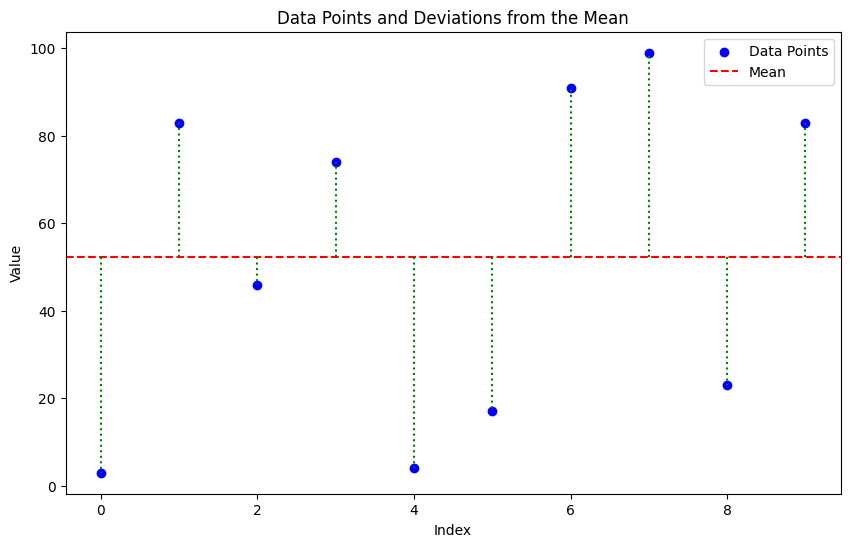

In [6]:
# Minimizing Squared Deviations
mean_value = np.mean(data)
squared_deviations = (data - mean_value) ** 2
sum_of_squared_deviations = squared_deviations.sum()
print(f"\nSum of squared deviations from the mean: {sum_of_squared_deviations:.2f}") 
print(f"\nSum of squared deviations from c=mean-1: {((data - (mean_value - 1)) ** 2).sum():.2f}")
print(f"\nSum of squared deviations from c=mean+1: {((data - (mean_value + 1)) ** 2).sum():.2f}")  
# Visualizing Squared Deviations
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, color='blue', label='Data Points')
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean')
for i in range(len(data)):
    plt.plot([i, i], [mean_value, data[i]], color='green', linestyle=':')
plt.title('Data Points and Deviations from the Mean')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## 2. The Standard Deviation ($\sigma$)
The **standard deviation** measures the spread or dispersion of a dataset around its mean. A low standard deviation indicates that the data points are close to the mean, while a high standard deviation indicates that they are more spread out.
### Definition
The standard deviation is defined as the square root of the variance, which is the average of the squared deviations from the mean.
$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2}$$
$$\sigma = \sqrt{mean({(x_i - \bar{x})^2})}$$


In [9]:
# Computing Standard Deviation and Variance
variance = np.mean((data - mean_value) ** 2)
std_deviation = np.sqrt(variance)
print(f"\nVariance: {variance:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")   
# more simple way to compute std and variance
print(f"Variance (using np.var): {np.var(data):.2f}")
print(f"Standard Deviation (using np.std): {np.std(data):.2f}")


Variance: 1294.21
Standard Deviation: 35.98
Variance (using np.var): 1294.21
Standard Deviation (using np.std): 35.98


**Question**: Why do we square the deviations when calculating variance and standard deviation instead of using absolute deviations?

>Squaring the deviations has several advantages:
>1. **Mathematical Convenience**: Squared deviations are easier to manipulate mathematically, especially when taking derivatives, which is useful in optimization problems.
>2. **Emphasizing Larger Deviations**: Squaring gives more weight to larger deviations, making the standard deviation more sensitive to outliers.
>3. **Differentiability**: The squared function is differentiable everywhere, while the absolute value function is not differentiable at zero, complicating mathematical analysis.

**Question**: Can a standard deviation be negative?

>No, a standard deviation cannot be negative. By definition, the standard deviation is the square root of the variance, and since variance is calculated as the average of squared deviations from the mean, it is always non-negative. Therefore, the standard deviation, being the square root of a non-negative number, is also always non-negative.

**Property 1: Translation**

Translating all data points by a constant does not change the standard deviation:

$$\text{std}(\{x + c\}) = \text{std}(\{x\})$$

**Property 2: Scaling**

Scaling all data points by a constant scales the standard deviation by the absolute value of that constant:
$$\text{std}(\{kx\}) = |k| \cdot \text{std}(\{x\})$$

## 3 Computing Mean and Standard Deviation Online

One useful feature of means and standard deviations is that you can estimate them **online** - you can update your estimates as new data arrives without storing all previous data.

### Online Algorithm

After seeing $k$ elements, write $\hat{\mu}_k$ for the estimated mean and $\hat{\sigma}_k$ for the estimated standard deviation.

**Mean Update:**

$$\hat{\mu}_{k+1} = \frac{k \cdot \hat{\mu}_k + x_{k+1}}{k+1}$$

**Standard Deviation Update:**

$$\hat{\sigma}_{k+1} = \sqrt{\frac{k \cdot \hat{\sigma}_k^2 + (x_{k+1} - \hat{\mu}_{k+1})^2}{k+1}}$$

This is particularly useful for streaming data or when memory is limited.

In [ ]:
class OnlineStats:
    def __init__(self):
        self.count = 0
        self.mean = 0.0
        self.var = 0.0
    
    def update(self, x):
        self.count += 1
        k = self.count
        
        # Update mean
        new_mean = ((k-1) * self.mean + x) / k
        
        # Update variance
        if k > 1:
            new_var = ((k-1) * self.var + (x - new_mean)**2) / k
            self.var = new_var
        
        self.mean = new_mean
    
    @property
    def std(self):
        return np.sqrt(self.var)

# Example usage
stats = OnlineStats()
for value in data:
    stats.update(value)

print(f"Online Mean: ${stats.mean:,.2f}")
print(f"Online Std: ${stats.std:,.2f}")
print(f"\nComparison with NumPy:")
print(f"NumPy Mean: ${mean:,.2f}")
print(f"NumPy Std: ${std:,.2f}")

## 1.3.4 The Median

The **median** is an alternative measure of central tendency that is more robust to outliers than the mean.

### Definition

The median is obtained by:
1. Sorting the data points
2. Finding the point halfway along the list
3. If the list has even length, averaging the two middle values

**Examples:**
- median({3, 5, 7}) = 5
- median({3, 4, 5, 6, 7}) = 5  
- median({3, 4, 5, 6}) = (4+5)/2 = 4.5

### Median vs Mean with Outliers

Consider our bar example again. Now a billionaire walks in with net worth $1,000,000,000.

**With billionaire:**
- Mean = $91,007,184 (dramatically increased!)
- Median = $108,930 (barely changed)

The median remains an effective summary because it's not affected by extreme values. For the original data:
- Median = $107,835

The small change in median ($107,835 → $108,930$) compared to the huge change in mean shows the median's robustness.

### Properties of the Median

- $\text{median}(\{x + c\}) = \text{median}(\{x\}) + c$
- $\text{median}(\{kx\}) = k \cdot \text{median}(\{x\})$

In [ ]:
median = np.median(data)
print(f"Original Data:")
print(f"Mean: ${mean:,.2f}")
print(f"Median: ${median:,.2f}")

# Add billionaire
data_with_billionaire = np.append(data, 1000000000)
mean_with = np.mean(data_with_billionaire)
median_with = np.median(data_with_billionaire)

print(f"\nWith Billionaire:")
print(f"Mean: ${mean_with:,.2f}")
print(f"Median: ${median_with:,.2f}")
print(f"\nChanges:")
print(f"Mean changed by: ${mean_with - mean:,.2f} ({(mean_with/mean - 1)*100:.1f}%)")
print(f"Median changed by: ${median_with - median:,.2f} ({(median_with/median - 1)*100:.1f}%)")

## 1.3.5 Percentiles and Quartiles

### Percentiles

The **kth percentile** is the value such that k% of the data is less than or equal to that value.

We write $\text{percentile}(\{x\}, k)$ for the kth percentile.

### Quartiles

Quartiles divide the data into four equal parts:

- **First Quartile (Q1)**: 25th percentile - $\text{percentile}(\{x\}, 25)$
- **Second Quartile (Q2)**: 50th percentile (the median) - $\text{percentile}(\{x\}, 50)$
- **Third Quartile (Q3)**: 75th percentile - $\text{percentile}(\{x\}, 75)$

### Interquartile Range (IQR)

The **interquartile range** measures the spread of the middle 50% of the data:

$$\text{IQR}(\{x\}) = Q3 - Q1 = \text{percentile}(\{x\}, 75) - \text{percentile}(\{x\}, 25)$$

The IQR is robust to outliers, unlike the standard deviation.

### IQR Example with Outliers

For our net worth data:
- Without billionaire: IQR = $12,350
- With billionaire: IQR = $17,710

Compare to standard deviation:
- Without billionaire: $\sigma = 9,265$
- With billionaire: $\sigma = 301,400,000$ (completely distorted!)

### Properties of the Interquartile Range

- $\text{IQR}(\{x + c\}) = \text{IQR}(\{x\})$
- $\text{IQR}(\{kx\}) = |k| \cdot \text{IQR}(\{x\})$

In [ ]:
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # median
q3 = np.percentile(data, 75)
iqr = q3 - q1

print("Quartiles:")
print(f"Q1 (25th): ${q1:,.2f}")
print(f"Q2 (50th/Median): ${q2:,.2f}")
print(f"Q3 (75th): ${q3:,.2f}")
print(f"\nInterquartile Range: ${iqr:,.2f}")
print(f"Standard Deviation: ${std:,.2f}")

# Outlier detection bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"\nOutlier Detection Bounds:")
print(f"Lower: ${lower_bound:,.2f}")
print(f"Upper: ${upper_bound:,.2f}")

# Check for outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"\nOutliers: {outliers}")

### Outlier Detection

A common rule: data items are considered outliers if they are:
- Less than $Q1 - 1.5 \times \text{IQR}$, or
- Greater than $Q3 + 1.5 \times \text{IQR}$

This is the criterion used in box plots.

## 1.3.6 Using Summaries Sensibly

### Reporting Precision

Be careful about the number of **significant figures** you report. Statistical software produces many digits, but not all are meaningful.

**Example:** Reporting "mean pregnancy length = 32.833 weeks" implies precision to ~0.001 weeks or 10 minutes. This is unrealistic given:
- People's memories are imprecise
- Medical records have limited accuracy  
- Respondents may misreport

**Better:** "mean pregnancy length ≈ 32.8 weeks"

### Categorical vs Continuous Variables

The statement "the average US family has 2.6 children" is problematic because:
- Number of children is **categorical** (discrete values)
- No family actually has 2.6 children

**Better phrasing:** "The mean of the number of children in a US family is 2.6"

**Or better yet:** Report the median and distribution for categorical data.

### When Mean vs Median?

**Use the mean when:**
- Data is roughly symmetric
- No significant outliers
- Data is continuous

**Use the median when:**
- Data is skewed
- Outliers are present
- Data is categorical/ordinal
- You want a robust measure

**Best practice:** Look at both! If they differ significantly, investigate why.

## 1.3.7 Standard Coordinates (Z-Scores)

Standard coordinates (or z-scores) allow us to compare data from different scales.

### Definition

For data item $x_i$ with dataset mean $\bar{x}$ and standard deviation $\sigma$:

$$z_i = \frac{x_i - \bar{x}}{\sigma}$$

We write $\{\tilde{x}\}$ for a dataset in standard coordinates.

### Properties

- $\text{mean}(\{\tilde{x}\}) = 0$ (always!)
- $\text{std}(\{\tilde{x}\}) = 1$ (always!)
- Unitless - can compare across different measurements

### Interpretation

A z-score tells you how many standard deviations a value is from the mean:
- $z = 0$: at the mean
- $z = 1$: one standard deviation above the mean
- $z = -2$: two standard deviations below the mean

In [ ]:
# Calculate z-scores
z_scores = (data - mean) / std

print("Original Value → Z-score:")
print("-" * 30)
for i, (value, z) in enumerate(zip(data, z_scores)):
    print(f"${value:>9,} → z = {z:6.2f}")

print(f"\nVerification:")
print(f"Mean of z-scores: {np.mean(z_scores):.10f}")
print(f"Std of z-scores:  {np.std(z_scores):.10f}")

## Summary

### Location Parameters (Where is the data?)

| Measure | Formula | Robust? | Use When |
|---------|---------|---------|----------|
| Mean | $\frac{1}{N}\sum x_i$ | No | Symmetric data, no outliers |
| Median | Middle value | Yes | Skewed data, outliers present |

### Scale Parameters (How spread out?)

| Measure | Formula | Robust? | Use When |
|---------|---------|---------|----------|
| Std Dev | $\sqrt{\frac{1}{N}\sum(x_i-\bar{x})^2}$ | No | Normal-ish data |
| Variance | $(\text{std})^2$ | No | Mathematical convenience |
| IQR | $Q3 - Q1$ | Yes | Outliers present |

### Key Takeaways

1. **Mean vs Median**: Use median for skewed data or when outliers are present
2. **Standard Deviation**: Measures typical deviation from mean; sensitive to outliers
3. **IQR**: Robust measure of spread; good for data with outliers
4. **Z-scores**: Standardize data for comparison across different scales
5. **Precision matters**: Don't report meaningless digits
6. **Categorical data**: Prefer median and percentiles over mean

## Practice Problems

Try calculating these statistics for:

1. **Test scores**: [85, 92, 78, 90, 88, 95, 100, 72, 86, 91]
   - Mean, median, std dev, IQR
   - Compare mean vs median

2. **Income data** (deliberately skewed): [45000, 52000, 48000, 51000, 2500000, 46000, 49000]
   - Why is median better than mean here?
   - Calculate both and compare

3. **Heights** (in cm): [165, 170, 168, 172, 175, 171, 169, 173, 166, 174]
   - Convert to z-scores
   - Which heights are more than 1 std dev from mean?

## Next Steps

→ Continue to [1.4 Plots and Summaries](ch01_plots_summaries.md) to learn about combining visualizations with these numerical summaries.

→ See [Chapter 2: Looking at Relationships](chapter02.md) for analyzing relationships between variables.